In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\4-gauss\4-gauss_AW_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.067351,3.53370,0.469590,0.67908,3.43440,2.79240,2.77630,1.6991,3.815600,1.746400
1,-0.098505,-0.17857,2.062800,2.92160,0.424720,1.17850,1.68020,1.38880,3.21670,2.9236,0.772910,0.641450
2,-0.169460,0.50153,2.470900,3.06500,1.567600,1.48240,0.92160,2.64240,1.51870,2.5318,2.432800,1.876800
3,-0.136050,0.47279,0.588090,1.95630,2.787000,2.59570,2.89330,1.53750,0.99942,3.6593,0.618250,3.265800
4,0.098830,0.23418,0.429700,1.63120,3.554100,2.27110,0.37425,2.17860,1.31400,1.0632,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.68670,1.576000,0.55612,0.070769,2.07470,0.80304,3.22290,3.49330,1.3255,3.231100,0.005387
796,3.466600,-4.03460,3.100400,1.34610,1.377300,2.28870,0.39613,2.39610,2.46350,1.6675,2.461700,1.226700
797,3.344800,-2.38430,2.031000,2.26460,3.341200,1.53700,1.22560,0.74027,2.49540,1.3433,1.622500,1.585300
798,3.441400,NaN,1.577000,1.84400,1.098700,3.42430,NaN,3.72700,1.18790,NaN,1.884500,1.143700


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	26
float64		column 2	131
float64		column 3	26
float64		column 4	13
float64		column 5	13
float64		column 6	27
float64		column 7	13
float64		column 8	66
float64		column 9	0
float64		column 10	65
float64		column 11	65
float64		column 12	26


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,774.000000,669.00000,774.000000,787.000000,787.000000,773.000000,787.000000,734.000000,800.000000,735.000000,735.000000,774.000000
mean,1.511780,1.17628,1.977623,1.936792,1.993030,2.013613,1.962403,1.977333,1.996376,1.982272,1.958065,1.963863
std,2.746197,3.63268,1.147401,1.168174,1.171475,1.141640,1.166885,1.150422,1.143093,1.155221,1.198419,1.125929
min,-4.692600,-6.34150,0.020547,0.002628,0.021103,0.001674,0.005922,0.004193,0.009369,0.002484,0.002000,0.000288
25%,-0.405610,-1.98460,1.019925,0.927780,0.968600,1.002900,0.954415,0.945905,1.058925,0.999855,0.856220,1.001800
50%,0.969530,0.48786,1.965800,1.905100,2.035700,2.012800,1.969800,1.973300,1.988450,1.974100,1.953700,1.956350
75%,3.974250,4.47340,2.926225,2.944050,3.003150,3.034500,2.989500,2.940625,3.005125,2.995200,3.056700,2.870700
max,6.982200,8.01880,3.992600,3.997300,3.998500,3.997500,3.999900,3.998200,3.996200,3.997600,3.990900,3.998300


<AxesSubplot:>

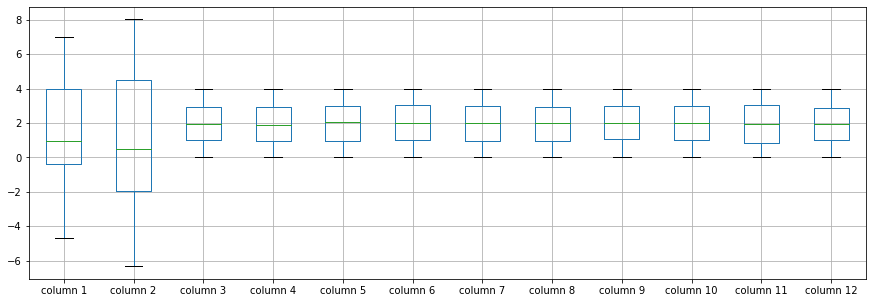

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.511780
column 2     1.176280
column 3     1.977623
column 4     1.936792
column 5     1.993030
column 6     2.013613
column 7     1.962403
column 8     1.977333
column 9     1.996376
column 10    1.982272
column 11    1.958065
column 12    1.963863
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,-0.441853,-0.023850,-0.006931,0.045365,0.036003,-0.008150,0.031822,-0.004397,-0.001511,0.033096,0.022709
column 2,-0.441853,1.000000,0.012323,0.002217,-0.043741,-0.020013,0.030496,-0.018751,0.016464,-0.023817,-0.088563,0.039148
column 3,-0.023850,0.012323,1.000000,-0.033795,0.078637,-0.003939,0.030977,-0.007056,0.012034,-0.021976,-0.037495,-0.003704
column 4,-0.006931,0.002217,-0.033795,1.000000,0.003159,-0.033330,0.042045,0.054830,-0.029673,0.030975,0.046553,-0.016184
column 5,0.045365,-0.043741,0.078637,0.003159,1.000000,0.047189,0.020505,-0.014712,-0.003789,-0.009404,0.012880,0.010393
column 6,0.036003,-0.020013,-0.003939,-0.033330,0.047189,1.000000,-0.073898,0.045684,0.019035,-0.009875,-0.017698,0.002522
column 7,-0.008150,0.030496,0.030977,0.042045,0.020505,-0.073898,1.000000,-0.016234,-0.004741,-0.036015,-0.030943,-0.004191
column 8,0.031822,-0.018751,-0.007056,0.054830,-0.014712,0.045684,-0.016234,1.000000,-0.083777,-0.053856,-0.008149,-0.062040
column 9,-0.004397,0.016464,0.012034,-0.029673,-0.003789,0.019035,-0.004741,-0.083777,1.000000,0.018432,-0.006488,-0.028077
column 10,-0.001511,-0.023817,-0.021976,0.030975,-0.009404,-0.009875,-0.036015,-0.053856,0.018432,1.000000,-0.088296,0.042931


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+15,12+15+15,12+15+15,12+15+15+15+15,12+15+15+15,12+15+15,12+15,12], vae_layer = False, seed = 100)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 27.966714477539064
Epoch: 1 , loss: 27.839321365356444
Epoch: 2 , loss: 27.700684432983397
Epoch: 3 , loss: 27.526477699279784
Epoch: 4 , loss: 27.27524200439453
Epoch: 5 , loss: 26.698514251708986
Epoch: 6 , loss: 25.185194549560546
Epoch: 7 , loss: 22.457577590942382
Epoch: 8 , loss: 20.877684745788574
Epoch: 9 , loss: 20.403282890319826
Epoch: 10 , loss: 20.222724952697753
Epoch: 11 , loss: 20.03528106689453
Epoch: 12 , loss: 19.76759635925293
Epoch: 13 , loss: 19.832873458862306
Epoch: 14 , loss: 19.401217155456543
Epoch: 15 , loss: 19.208184700012207
Epoch: 16 , loss: 19.418262519836425
Epoch: 17 , loss: 19.420330924987795
Epoch: 18 , loss: 19.15186861038208
Epoch: 19 , loss: 19.31902214050293
Epoch: 20 , loss: 19.139721946716307
Epoch: 21 , loss: 19.031281814575195
Epoch: 22 , loss: 19.002879638671875
Epoch: 23 , loss: 19.096751899719237
Epoch: 24 , loss: 19.004780807495116
Epoch: 25 , loss: 18.9

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(800, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.463080
column 2     0.042845
column 3     3.034900
column 4     0.379700
column 5     2.475300
column 6     2.162000
column 7     1.670000
column 8     0.755510
column 9     2.032100
column 10    3.847400
column 11    0.230250
column 12    0.359250
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\4-gauss.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
796,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
797,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
798,0.0,5.545028,0.0,0.0,0.0,0.0,-0.092597,0.0,0.0,-0.231684,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(51.84299679920957, 248.22200824735242)

In [17]:
NRMS=numerator/denominator
NRMS


0.20885737395029128

In [18]:
new_df.iloc[66,:]

column 1     0.20762
column 2    -0.55052
column 3     2.33990
column 4     1.79480
column 5     1.40130
column 6     2.76580
column 7     1.30410
column 8     1.24930
column 9     1.05940
column 10    1.28430
column 11    1.87940
column 12    0.57524
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.161340,0.067351,3.53370,0.469590,0.67908,3.434400,2.79240,2.77630,1.699100,3.815600,1.746400
1,-0.098505,-0.178570,2.062800,2.92160,0.424720,1.17850,1.680200,1.38880,3.21670,2.923600,0.772910,0.641450
2,-0.169460,0.501530,2.470900,3.06500,1.567600,1.48240,0.921600,2.64240,1.51870,2.531800,2.432800,1.876800
3,-0.136050,0.472790,0.588090,1.95630,2.787000,2.59570,2.893300,1.53750,0.99942,3.659300,0.618250,3.265800
4,0.098830,0.234180,0.429700,1.63120,3.554100,2.27110,0.374250,2.17860,1.31400,1.063200,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.686700,1.576000,0.55612,0.070769,2.07470,0.803040,3.22290,3.49330,1.325500,3.231100,0.005387
796,3.466600,-4.034600,3.100400,1.34610,1.377300,2.28870,0.396130,2.39610,2.46350,1.667500,2.461700,1.226700
797,3.344800,-2.384300,2.031000,2.26460,3.341200,1.53700,1.225600,0.74027,2.49540,1.343300,1.622500,1.585300
798,3.441400,0.328728,1.577000,1.84400,1.098700,3.42430,0.718213,3.72700,1.18790,0.719436,1.884500,1.143700


In [20]:
imputations[-1].to_excel("4-gauss_AW_5(imp).xlsx", index=False, header=False)